In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Main DataFrame Name: "grouped_frame"

grouped_frame = pd.read_csv('grouped_data.csv')

grouped_frame.set_index(['Country Name', 'Indicator Name'], inplace = True)
grouped_frame.sort_values(by = ['Country Name'], inplace = True)


for column in grouped_frame.columns:
    grouped_frame[column].astype('float')


Displaying Potential Climate Indicators for United States


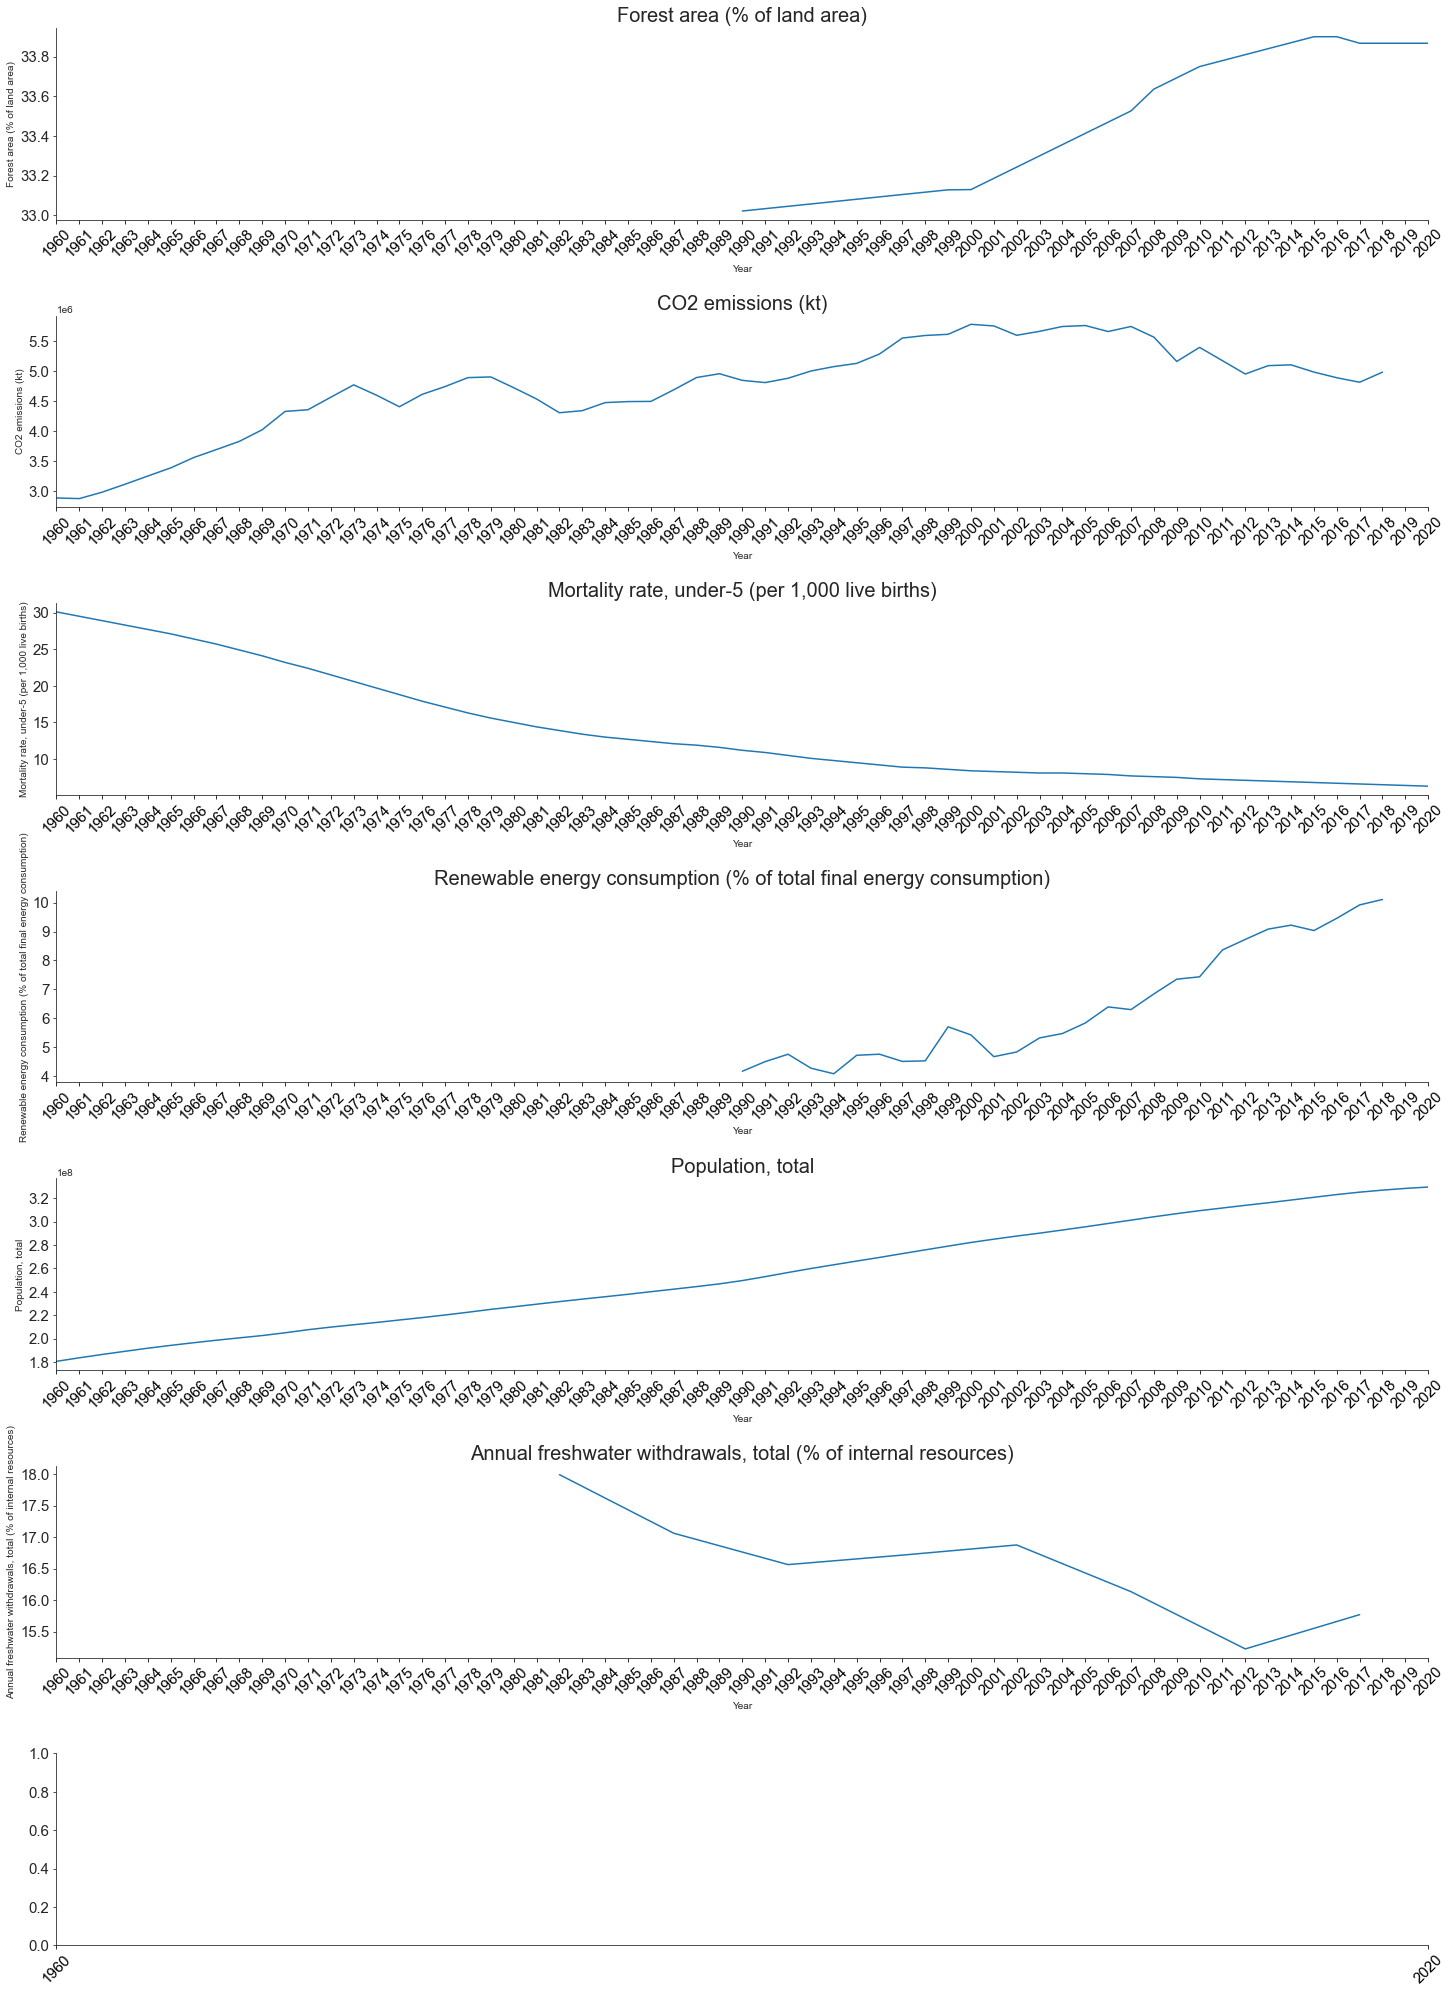

In [160]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

def create_subset(df, indicators, country):
    subset = df.reset_index()
    subset = subset[
            (subset['Country Name'] == country)
        ].drop(columns = 'Country Name'
        ).set_index('Indicator Name').T

    subset.columns.name = None
    subset.index.name = 'Year'
    subset.reset_index(inplace = True)
    # print(subset.columns)
    # subset.columns = [
    #     'Year', 
    #     'Population', 
    #     'CO2 Emissions', 
    #     'Renewable Energy Consumption', 
    #     'Mortality Rate (under-5)', 
    #     'Annual Freshwater Withdrawals', 
    #     'Forest Area'
    # ]
    
    # print(subset.Population.tolist())
    
    return subset, subset.columns.tolist()[1:]
    
def plot_data(df, country):
    
    year = mdates.YearLocator()
    sns.set_style("ticks",{"xtick.color": 'black','axes.grid': False})
    fig, axs = plt.subplots(7,figsize = (20,30), gridspec_kw={'height_ratios':[1,1,1,1,1,1,1]}, sharex = False)
    #sns.lineplot(data = subset, x = 'Year', y = subset.indicators, ax = axs[0])
    
    indicators = df.index.get_level_values(1).unique().tolist()
    #countries = df.index.get_level_values(0).unique().tolist()
    
    subset, cleaned_indicator = create_subset(df, indicators, country)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[0], ax = axs[0]).set_title(cleaned_indicator[0], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[1], ax = axs[1]).set_title(cleaned_indicator[1], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[2], ax = axs[2]).set_title(cleaned_indicator[2], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[3], ax = axs[3]).set_title(cleaned_indicator[3], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[4], ax = axs[4]).set_title(cleaned_indicator[4], fontsize = 20)
    sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[5], ax = axs[5]).set_title(cleaned_indicator[5], fontsize = 20)
        
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(hspace = 0.5,
                       top = 0.9)
    min_ = min(subset.Year)
    max_ = max(subset.Year)
    for ax in axs:
        ax.set_xlim(min_,max_)
        ax.set_ylabel = ""
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
            
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(15) 
        
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(15)
    
    return plt
    
    
#visual = plot_data(grouped_frame)
#visual.show()

countries = grouped_frame.index.get_level_values(0).unique().tolist()
country = countries[253]
visual =  plot_data(grouped_frame, country)
print(f'Displaying Potential Climate Indicators for {country}')
visual.show()